In [1]:
#!pip install pdfplumber

In [ ]:
import pandas as pd
import numpy as np
import pdfplumber
import os

In [ ]:
# This code will read the pdf files in the pdf folder and extract the text from them
# It will output three values: the year of the debate, the title/subject of the debate, and the text of the debate

# firstTime = True
for pdf in os.listdir("pdf"):
    print(pdf)
    pdf = pdfplumber.open("pdf/" + pdf)

    pdf_text = ""
    for page in pdf.pages:
        # Divide the page into two columns and ignoring the footer
        left_box = page.within_bbox((0, 0, page.width / 2, page.height - 100))
        left_text = left_box.extract_text()
        right_box = page.within_bbox((page.width / 2, 0, page.width, page.height - 100))
        right_text = right_box.extract_text()
        
        pdf_text += left_text + right_text
        
        # Clean the data
        pdf_text = pdf_text.replace("-\n", "")

    first_page = pdf.pages[0]
    year_box = first_page.within_bbox((first_page.width / 2, first_page.height - 100, first_page.width, first_page.height - 70))
    year_text = year_box.extract_text()

    # print(pdf_text)

    pdf_subject = pdf_text.split("\n")[1]

    # print(pdf_subject)
    pdf_text = pdf_text.strip().replace("\n", " ")
    pdf_text = pdf_text.replace(",", "")

    # # IF YOU WANT TO STORE THE DATA IN A CSV FILE
    # # Using a txt is necessary as some of the text goes over the character limit of csv
    # # Make sure to also uncomment the first line of this code, if you want to use this

    # file_name = "txt/" + pdf + ".txt"
    # with open(file_name, "w") as f:
    #     f.write(pdf_text)

    # pdf_df = pd.DataFrame({"date": [year_text], "subject": [pdf_subject], "text": [file_name]})

    # if firstTime:
    #     pdf_df.to_csv("debates.csv", index=False)
    #     firstTime = False
    # else:
    #     pdf_df.to_csv("debates.csv", mode='a', header=False, index=False)


0a8c1638-fb56-40c7-85ac-3947c9053398.pdf
0a9f7faa-4b9c-4c23-a078-0e28e9afaa04.pdf


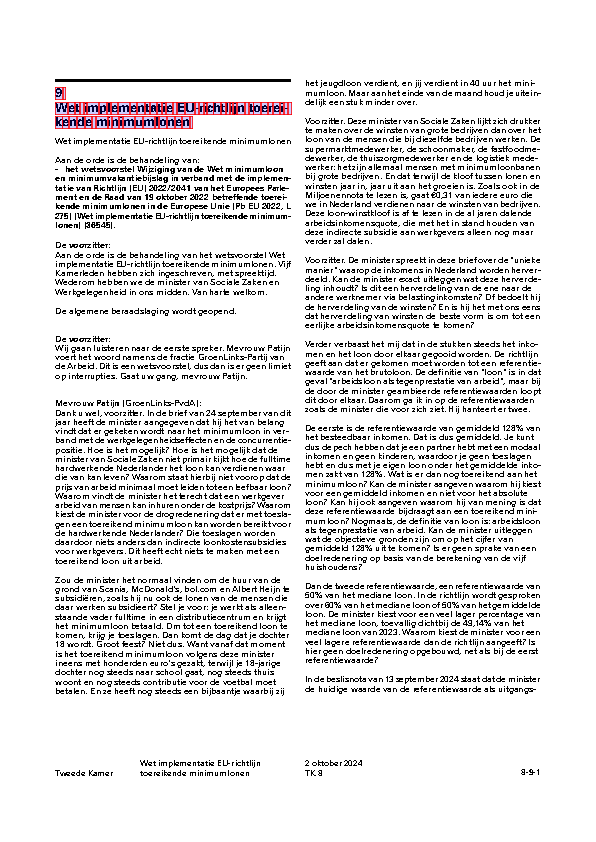

In [ ]:
# This code shows how the box is drawn using the pdfplumber library

# pdf = pdfplumber.open("pdf/0a8c1638-fb56-40c7-85ac-3947c9053398.pdf")
# page = pdf.pages[0]

# year_box = page.within_bbox((0, 0, page.width / 2, page.height - 700))


# im = page.to_image()
# im.draw_rects(year_box.chars)
